In [1]:
import pandas as pd
import numpy as np
import matplotlib
pd.set_option('display.max_rows', 500)

%matplotlib inline
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.grid_search import GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.cross_validation import LabelKFold
from scipy import interp
from sklearn import cross_validation
import pylab as pl

from sklearn import svm
from sklearn.metrics import roc_curve, auc
from os import environ
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

C:\Users\tmeshorer\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\tmeshorer\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
df = pd.read_csv("../data/ml.csv")

In [3]:
labels_s = df['hash']
labels = labels_s.values
label_kfold = LabelKFold(labels,n_folds=10)

In [4]:
tchange_column = df['tchange']
target = tchange_column.values
del df['tchange']

In [5]:
#base line
from sklearn.cross_validation import LabelKFold

X_only_act = df[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV']]

base_line_features_array = X_only_act.values

In [6]:
X_both_acts = df[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV',
 'PAct_%',
 'PAct_+',
 'PAct_A',
 'PAct_AA',
 'PAct_B',
 'PAct_NA',
 'PAct_Q',
 'PAct_SD',
 'PAct_SV',
   ]]

both_acts_features_array = X_both_acts.values

In [7]:
X_only_numeric = df[[
     'precent_secs_sofar',
     'precent_words_sofar',
     'time_control',
     'words_control' , 
    ]]

summary_features_array = X_only_numeric.values

In [8]:
X_all =  df[[
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV',
 'PAct_%',
 'PAct_+',
 'PAct_A',
 'PAct_AA',
 'PAct_B',
 'PAct_NA',
 'PAct_Q',
 'PAct_SD',
 'PAct_SV',
 'precent_secs_sofar',
 'precent_words_sofar',
 'time_control',
 'words_control'
   ]]

all_features_array = X_all.values

In [9]:
len(all_features_array)

39587

In [26]:
#Use random forest
result = dict()
measure=['f1','recall','precision','roc_auc','accuracy'] 
#measure=['roc_auc'] 
for m in measure:
    result[m] = dict()
data   =[("baseline",base_line_features_array),("both",both_acts_features_array),("summary",summary_features_array),("all",all_features_array)]
for m in measure:
    for d in data:
        print "running %s on %s" %(m,d[0])
        rf = RandomForestClassifier(n_estimators=200,n_jobs=-1)
        x= cross_validation.cross_val_score(rf, d[1], target, cv=label_kfold,scoring=m)
        result[m][d[0]] = np.mean(x)
result        
        

running f1 on baseline
running f1 on both
running f1 on summary
running f1 on all
running recall on baseline
running recall on both
running recall on summary
running recall on all
running precision on baseline
running precision on both
running precision on summary
running precision on all
running roc_auc on baseline
running roc_auc on both
running roc_auc on summary
running roc_auc on all
running accuracy on baseline
running accuracy on both
running accuracy on summary
running accuracy on all


{'accuracy': {'all': 0.75458683137955418,
  'baseline': 0.62431986371844483,
  'both': 0.74821476311879331,
  'summary': 0.65345462328623449},
 'f1': {'all': 0.77523790074971932,
  'baseline': 0.57715184657056562,
  'both': 0.74784289359006217,
  'summary': 0.69246936739115972},
 'precision': {'all': 0.77317590335913366,
  'baseline': 0.7465070844968269,
  'both': 0.82330428662253963,
  'summary': 0.67079841380914274},
 'recall': {'all': 0.77743657707179237,
  'baseline': 0.47067572095894078,
  'both': 0.68548649579497423,
  'summary': 0.71493673179046302},
 'roc_auc': {'all': 0.83512749363837391,
  'baseline': 0.65574802268598076,
  'both': 0.81083222312824632,
  'summary': 0.69038325710339976}}

In [15]:
result_df = pd.DataFrame(result)
result_df
text_file = open("..\tbl\auc_tbl.tex", "w")
text_file.write(result_df.to_latex())
text_file.close()

NameError: name 'result' is not defined

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
#Use gb
result = dict()
#measure=['f1','recall','precision','roc_auc'] 
measure=['roc_auc'] 
for m in measure:
    result[m] = dict()
data   =[("baseline",base_line_features_array),("both",both_acts_features_array),("summary",summary_features_array),("all",all_features_array)]
for m in measure:
    for d in data:
        print "running %s on %s" %(m,d[0])
        rf = GradientBoostingClassifier(random_state=0, n_estimators=300)
        x= cross_validation.cross_val_score(rf, d[1], target, cv=label_kfold,scoring=m)
        print "result for %s is %f" %(m,np.mean(x))
        result[m][d[0]] = np.mean(x)
result       

running roc_auc on baseline
result for roc_auc is 0.656383
running roc_auc on both
result for roc_auc is 0.811789
running roc_auc on summary
result for roc_auc is 0.722027
running roc_auc on all
result for roc_auc is 0.846288


{'roc_auc': {'all': 0.84628821744380855,
  'baseline': 0.65638282606188258,
  'both': 0.81178919689087325,
  'summary': 0.72202668508698309}}

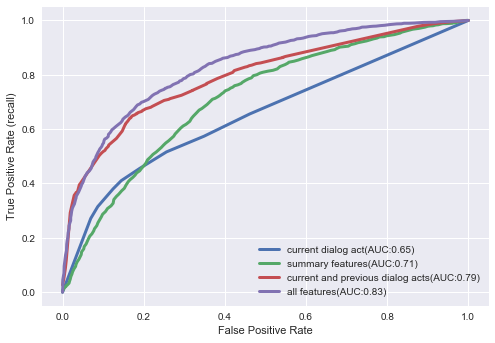

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
sns.set_style("darkgrid")
mean_tpr = 0.0

rf = RandomForestClassifier(n_estimators=200)
datasets=[base_line_features_array,summary_features_array,both_acts_features_array,all_features_array]
captions = ['current dialog act',
          'summary features',
          'current and previous dialog acts',
          'all features']
X=all_features_array
y=target
i=1
j=0
for a in datasets: 
    X=a
    for train, test in label_kfold:
        probas_ = rf.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)
        acc = rf.score(X[test], y[test])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate (recall)")
        plt.plot(fpr, tpr, label="%s(AUC:%.2f)" % (captions[j],roc_auc), linewidth=3)
        j = j + 1
        break
    plt.legend(loc='best')  
    plt.savefig('../figures/roc.pdf')



Feature ranking:
1. feature precent_secs_sofar (0.226248)
2. feature precent_words_sofar (0.214994)
3. feature time_control (0.157149)
4. feature words_control (0.132212)
5. feature PAct_B (0.059880)
6. feature Act_B (0.041923)
7. feature PAct_SD (0.025176)
8. feature PAct_Q (0.020661)
9. feature Act_SD (0.018612)
10. feature Act_+ (0.012187)
11. feature Act_AA (0.011708)
12. feature Act_Q (0.010851)
13. feature PAct_AA (0.010731)
14. feature PAct_SV (0.010154)
15. feature PAct_+ (0.009296)
16. feature Act_SV (0.008617)
17. feature Act_% (0.007521)
18. feature PAct_% (0.006323)
19. feature Act_A (0.004780)
20. feature PAct_A (0.004397)
21. feature Act_NA (0.003493)
22. feature PAct_NA (0.003086)


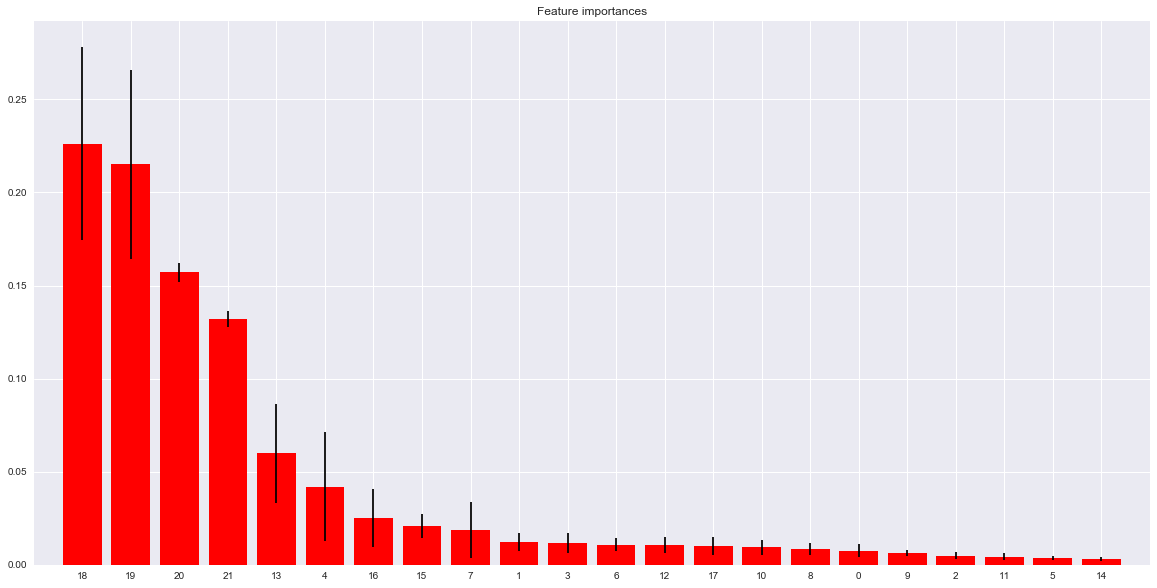

In [13]:
#Feature importance
names =  [
 'Act_%',
 'Act_+',
 'Act_A',
 'Act_AA',
 'Act_B',
 'Act_NA',
 'Act_Q',
 'Act_SD',
 'Act_SV',
 'PAct_%',
 'PAct_+',
 'PAct_A',
 'PAct_AA',
 'PAct_B',
 'PAct_NA',
 'PAct_Q',
 'PAct_SD',
 'PAct_SV',
 'precent_secs_sofar',
 'precent_words_sofar',
 'time_control',
 'words_control'
  ]
sns.set_style("darkgrid")
X=all_features_array
y=target
rf = RandomForestClassifier(n_estimators=200)
for train, test in label_kfold:
        rf.fit(X[train], y[train])
        importances = rf.feature_importances_
        std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
        indices = np.argsort(importances)[::-1]
    

        # Print the feature ranking
        print("Feature ranking:")

        for f in range(X.shape[1]):
            print("%d. feature %s (%f)" % (f + 1, names[indices[f]], importances[indices[f]]))

        # Plot the feature importances of the forest
        plt.figure(figsize=(20,10))
        plt.title("Feature importances")
        plt.bar(range(X.shape[1]), importances[indices],
               color="r", yerr=std[indices], align="center")
        plt.xticks(range(X.shape[1]), indices)
        plt.xlim([-1, X.shape[1]])
        plt.show()
        break

